# **For Equal Weights**

Importing Libraries and Data:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/content/Main_Ev Seclection Using Topsis.xlsx')
pd.options.display.float_format = '{:.10f}'.format

Visualizing Data Head:

In [4]:
print(df.head())

   Unnamed: 0              Unnamed: 1  Unnamed: 2             Topsis  \
0         NaN                     NaN         NaN                NaN   
1      Sl.no.                  Ev Car        Make              Model   
2           1  Audi e-tron 55 quattro        Audi  e-tron 55 quattro   
3           2  Audi e-tron 50 quattro        Audi  e-tron 50 quattro   
4           3   Audi e-tron S quattro        Audi   e-tron S quattro   

                    Unnamed: 4         Unnamed: 5           Unnamed: 6  \
0                     minimize           maximize             maximize   
1  Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]   
2                       345700                360                  664   
3                       308400                313                  540   
4                       414900                503                  973   

               Unnamed: 7         Unnamed: 8           Unnamed: 9  \
0                maximize           maximize         

Cleaning Data:

In [5]:
df_cleaned = pd.read_excel('/content/Main_Ev Seclection Using Topsis.xlsx', skiprows=2)
#Python read more columns than required because of the nature of the file, so we just cleaned all the extra columns out:
df_cleaned = df_cleaned.iloc[:, :14]
#Then, we cleaned all the empty rows out:
df_cleaned = df_cleaned.dropna()

df_cleaned.columns = ["Sl.no.", "Ev Car", "Make", "Model", "Price (PLN)", "Engine Power (KM)","Max Torque (Nm)", "Battery Capacity (kWh)", "Range (WLTP) (km)","Max Speed (kph)", "Boot Capacity (l)", "Acceleration (0-100 kph) (s)","Max DC Charging Power (kW)", "Energy Consumption (kWh/100 km)"]

df_cleaned.head(42)

,Sl.no.,Ev Car,Make,Model,Price (PLN),Engine Power (KM),Max Torque (Nm),Battery Capacity (kWh),Range (WLTP) (km),Max Speed (kph),Boot Capacity (l),Acceleration (0-100 kph) (s),Max DC Charging Power (kW),Energy Consumption (kWh/100 km)
0,1,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,95,438,200.0000000000,660.0000000000,5.7000000000,150.0000000000,24.4500000000
1,2,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,71,340,190.0000000000,660.0000000000,6.8000000000,150.0000000000,23.8000000000
2,3,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,95,364,210.0000000000,660.0000000000,4.5000000000,150.0000000000,27.5500000000
3,4,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,71,346,190.0000000000,615.0000000000,6.8000000000,150.0000000000,23.3000000000
4,5,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,95,447,200.0000000000,615.0000000000,5.7000000000,150.0000000000,23.8500000000
5,6,Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,95,369,210.0000000000,615.0000000000,4.5000000000,150.0000000000,27.2000000000
6,7,BMW i3,BMW,i3,169700,170,250,42.2000000000,359,160.0000000000,260.0000000000,8.1000000000,50.0000000000,13.1000000000
7,8,BMW i3s,BMW,i3s,184200,184,270,42.2000000000,345,160.0000000000,260.0000000000,6.9000000000,50.0000000000,14.3000000000
8,9,BMW iX3,BMW,iX3,282900,286,400,80,460,180.0000000000,510.0000000000,6.8000000000,150.0000000000,18.8000000000
9,10,DS DS3 Crossback e-tense,DS,DS3 Crossback e-tense,159900,136,260,50,320,150.0000000000,350.0000000000,8.7000000000,100.0000000000,15.6000000000


Normalization:

In [6]:
columns_to_numeric = ["Price (PLN)", "Engine Power (KM)", "Max Torque (Nm)","Battery Capacity (kWh)", "Range (WLTP) (km)", "Max Speed (kph)","Boot Capacity (l)", "Acceleration (0-100 kph) (s)","Max DC Charging Power (kW)", "Energy Consumption (kWh/100 km)"]
#This line is just to ensure that everything in the columns mentioned above is numeric, and no other data types have been entered:
df_cleaned[columns_to_numeric] = df_cleaned[columns_to_numeric].apply(pd.to_numeric, errors='coerce')

In [7]:
normalized_df = df_cleaned.copy()
for column in columns_to_numeric:
    normalized_df[column] = df_cleaned[column]/ np.sqrt(np.sum(df_cleaned[column] ** 2))
normalized_df.head(42)

,Sl.no.,Ev Car,Make,Model,Price (PLN),Engine Power (KM),Max Torque (Nm),Battery Capacity (kWh),Range (WLTP) (km),Max Speed (kph),Boot Capacity (l),Acceleration (0-100 kph) (s),Max DC Charging Power (kW),Energy Consumption (kWh/100 km)
0,1,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,0.1904718420,0.1986948628,0.2117229719,0.2320119759,0.1854149852,0.1782554558,0.2371256635,0.1060764858,0.1845377248,0.1980042547
1,2,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,0.1699204978,0.1727541446,0.1721843446,0.1733984241,0.1439294406,0.1693426830,0.2371256635,0.1265473865,0.1845377248,0.1927403379
2,3,Audi e-tron S quattro,Audi,e-tron S quattro,0.2285992689,0.2776208777,0.3102506802,0.2320119759,0.1540891658,0.1871682286,0.2371256635,0.0837445940,0.1845377248,0.2231090886
3,4,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,0.1761465082,0.1727541446,0.1721843446,0.1733984241,0.1464693719,0.1693426830,0.2209580046,0.1265473865,0.1845377248,0.1886911711
4,5,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,0.1966978525,0.1986948628,0.2117229719,0.2320119759,0.1892248822,0.1782554558,0.2209580046,0.1060764858,0.1845377248,0.1931452546
5,6,Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,0.2348252793,0.2776208777,0.3102506802,0.2320119759,0.1562057752,0.1871682286,0.2209580046,0.0837445940,0.1845377248,0.2202746719
6,7,BMW i3,BMW,i3,0.0935003517,0.0938281296,0.0797149744,0.1030621619,0.1519725564,0.1426043646,0.0934131402,0.1507402693,0.0615125749,0.1060881692
7,8,BMW i3s,BMW,i3s,0.1014894802,0.1015551521,0.0860921723,0.1030621619,0.1460460500,0.1426043646,0.0934131402,0.1284083775,0.0615125749,0.1158061694
8,9,BMW iX3,BMW,iX3,0.1558706511,0.1578520299,0.1275439590,0.1953785060,0.1947280667,0.1604299102,0.1832334672,0.1265473865,0.1845377248,0.1522486703
9,10,DS DS3 Crossback e-tense,DS,DS3 Crossback e-tense,0.0881008028,0.0750625037,0.0829035733,0.1221115663,0.1354630029,0.1336915919,0.1257484579,0.1619062151,0.1230251498,0.1263340030


Putting the weights in:

In [8]:
#Using Equal Weights:
weights = 0.1
#Multiplying weights with the data:
weighted_df = normalized_df.copy()
for column in columns_to_numeric:
    weighted_df[column] *= weights
weighted_df.head(42)

,Sl.no.,Ev Car,Make,Model,Price (PLN),Engine Power (KM),Max Torque (Nm),Battery Capacity (kWh),Range (WLTP) (km),Max Speed (kph),Boot Capacity (l),Acceleration (0-100 kph) (s),Max DC Charging Power (kW),Energy Consumption (kWh/100 km)
0,1,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,0.0190471842,0.0198694863,0.0211722972,0.0232011976,0.0185414985,0.0178255456,0.0237125663,0.0106076486,0.0184537725,0.0198004255
1,2,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,0.0169920498,0.0172754145,0.0172184345,0.0173398424,0.0143929441,0.0169342683,0.0237125663,0.0126547387,0.0184537725,0.0192740338
2,3,Audi e-tron S quattro,Audi,e-tron S quattro,0.0228599269,0.0277620878,0.0310250680,0.0232011976,0.0154089166,0.0187168229,0.0237125663,0.0083744594,0.0184537725,0.0223109089
3,4,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,0.0176146508,0.0172754145,0.0172184345,0.0173398424,0.0146469372,0.0169342683,0.0220958005,0.0126547387,0.0184537725,0.0188691171
4,5,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,0.0196697852,0.0198694863,0.0211722972,0.0232011976,0.0189224882,0.0178255456,0.0220958005,0.0106076486,0.0184537725,0.0193145255
5,6,Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,0.0234825279,0.0277620878,0.0310250680,0.0232011976,0.0156205775,0.0187168229,0.0220958005,0.0083744594,0.0184537725,0.0220274672
6,7,BMW i3,BMW,i3,0.0093500352,0.0093828130,0.0079714974,0.0103062162,0.0151972556,0.0142604365,0.0093413140,0.0150740269,0.0061512575,0.0106088169
7,8,BMW i3s,BMW,i3s,0.0101489480,0.0101555152,0.0086092172,0.0103062162,0.0146046050,0.0142604365,0.0093413140,0.0128408378,0.0061512575,0.0115806169
8,9,BMW iX3,BMW,iX3,0.0155870651,0.0157852030,0.0127543959,0.0195378506,0.0194728067,0.0160429910,0.0183233467,0.0126547387,0.0184537725,0.0152248670
9,10,DS DS3 Crossback e-tense,DS,DS3 Crossback e-tense,0.0088100803,0.0075062504,0.0082903573,0.0122111566,0.0135463003,0.0133691592,0.0125748458,0.0161906215,0.0123025150,0.0126334003


Cost and Benefit Criteria:

In [9]:
#benefit_criteria = ["Engine Power (KM)", "Max Torque (Nm)", "Battery Capacity (kWh)", "Range (WLTP) (km)", "Max Speed (kph)", "Boot Capacity (l)", "Max DC Charging Power (kW)"]
#cost_criteria = ["Price (PLN)", "Acceleration (0-100 kph) (s)", "Energy Consumption (kWh/100 km)"]

Ideal Solution:

In [10]:
ideal_solution = [weighted_df["Price (PLN)"].min()]+ [weighted_df["Engine Power (KM)"].max()] + [weighted_df["Max Torque (Nm)"].max()] + [weighted_df["Battery Capacity (kWh)"].max()] + [weighted_df["Range (WLTP) (km)"].max()] + [weighted_df["Max Speed (kph)"].max()] + [weighted_df["Boot Capacity (l)"].max()] + [weighted_df["Acceleration (0-100 kph) (s)"].min()] + [weighted_df["Max DC Charging Power (kW)"].max()] + [weighted_df["Energy Consumption (kWh/100 km)"].min()]
print(ideal_solution)

[0.004520744760277308, 0.03449563589482516, 0.033480289227546825, 0.02320119758844756, 0.023240371436890256, 0.023173209255545786, 0.02371256634782097, 0.005210774739520169, 0.033216790458498936, 0.01060881691670245]


In [11]:
distance_from_ideal = np.sqrt(((weighted_df[columns_to_numeric] - ideal_solution) ** 2).sum(axis=1))
print(distance_from_ideal)

0    0.0309622979
1    0.0348786398
2    0.0288752490
3    0.0349823826
4    0.0311066265
5    0.0291512221
6    0.0514921729
7    0.0506085084
8    0.0361147058
9    0.0487682799
10   0.0518746404
11   0.0511639715
12   0.0493519732
13   0.0481506119
14   0.0425181105
15   0.0324175306
16   0.0473130618
17   0.0415441399
18   0.0484567801
19   0.0427022790
20   0.0546569647
21   0.0317598280
22   0.0531728227
23   0.0506763567
24   0.0425311789
25   0.0490855042
26   0.0492207593
27   0.0486083125
28   0.0300480423
29   0.0290035622
30   0.0346070307
31   0.0415393549
32   0.0540560041
33   0.0519433359
34   0.0585546127
35   0.0630286381
36   0.0630153741
37   0.0586387005
38   0.0437092878
39   0.0416607462
40   0.0413262810
41   0.0525297079
dtype: float64


Non-Ideal Solution (Worst Solution):

In [12]:
non_ideal_solution = [weighted_df["Price (PLN)"].max()]+ [weighted_df["Engine Power (KM)"].min()] + [weighted_df["Max Torque (Nm)"].min()] + [weighted_df["Battery Capacity (kWh)"].min()] + [weighted_df["Range (WLTP) (km)"].min()] + [weighted_df["Max Speed (kph)"].min()] + [weighted_df["Boot Capacity (l)"].min()] + [weighted_df["Acceleration (0-100 kph) (s)"].max()] + [weighted_df["Max DC Charging Power (kW)"].min()] + [weighted_df["Energy Consumption (kWh/100 km)"].max()]
print(non_ideal_solution)

[0.04374736550469449, 0.004525827429401061, 0.005101758358483325, 0.0042983271321755485, 0.006265163884626153, 0.011586604627772893, 0.006143710371935433, 0.02437898181704079, 0.0027065532966184316, 0.022310908859171946]


In [13]:
distance_from_non_ideal_solution = np.sqrt(((weighted_df[columns_to_numeric] - non_ideal_solution) ** 2).sum(axis=1))
print(distance_from_non_ideal_solution)

0    0.0490237910
1    0.0446460778
2    0.0543394696
3    0.0437374580
4    0.0482798378
5    0.0536372713
6    0.0397949772
7    0.0394461441
8    0.0445967658
9    0.0406523640
10   0.0391444414
11   0.0388158543
12   0.0391695438
13   0.0405487819
14   0.0433668841
15   0.0486968783
16   0.0416375719
17   0.0444850265
18   0.0409243710
19   0.0439021481
20   0.0391480962
21   0.0469995090
22   0.0396711691
23   0.0414086977
24   0.0436367243
25   0.0419548753
26   0.0409798190
27   0.0423731065
28   0.0497096073
29   0.0551023815
30   0.0587912465
31   0.0608763999
32   0.0404867582
33   0.0406985982
34   0.0411963957
35   0.0395674646
36   0.0393767528
37   0.0405718280
38   0.0437130893
39   0.0460522461
40   0.0451958034
41   0.0380343454
dtype: float64


Evaluating Closeness and Ranking:

In [14]:
weighted_df["Closeness"] = distance_from_non_ideal_solution/(distance_from_ideal+distance_from_non_ideal_solution)
print(weighted_df["Closeness"])

0    0.6129039647
1    0.5614113340
2    0.6530031048
3    0.5556090774
4    0.6081620869
5    0.6478831674
6    0.4359318610
7    0.4380244998
8    0.5525455667
9    0.4546194508
10   0.4300685159
11   0.4313839680
12   0.4424861340
13   0.4571483540
14   0.5049413380
15   0.6003480634
16   0.4680975294
17   0.5170923811
18   0.4578635487
19   0.5069272966
20   0.4173345856
21   0.5967484084
22   0.4272884905
23   0.4496788102
24   0.5064150649
25   0.4608380976
26   0.4543188060
27   0.4657336294
28   0.6232581775
29   0.6551544284
30   0.6294682115
31   0.5944046408
32   0.4282375214
33   0.4393107571
34   0.4129922730
35   0.3856624527
36   0.3845681691
37   0.4089467983
38   0.5000217419
39   0.5250333492
40   0.5223614727
41   0.4199717661
Name: Closeness, dtype: float64


In [15]:
weighted_df["Rank"] = weighted_df["Closeness"].rank(ascending=False)
final_ranking = weighted_df[["Ev Car", "Closeness", "Rank"]].sort_values(by="Rank")

In [16]:
final_ranking = weighted_df[["Ev Car", "Closeness", "Rank"]].sort_values(by="Rank")

Output:

In [17]:
final_ranking.head(6)

,Ev Car,Closeness,Rank
29,Porsche Taycan 4S (Performance Plus),0.6551544284,1.0000000000
2,Audi e-tron S quattro,0.6530031048,2.0000000000
5,Audi e-tron Sportback S quattro,0.6478831674,3.0000000000
30,Porsche Taycan Turbo,0.6294682115,4.0000000000
28,Porsche Taycan 4S (Performance),0.6232581775,5.0000000000
0,Audi e-tron 55 quattro,0.6129039647,6.0000000000


In [18]:
final_ranking.head(42)

,Ev Car,Closeness,Rank
29,Porsche Taycan 4S (Performance Plus),0.6551544284,1.0000000000
2,Audi e-tron S quattro,0.6530031048,2.0000000000
5,Audi e-tron Sportback S quattro,0.6478831674,3.0000000000
30,Porsche Taycan Turbo,0.6294682115,4.0000000000
28,Porsche Taycan 4S (Performance),0.6232581775,5.0000000000
0,Audi e-tron 55 quattro,0.6129039647,6.0000000000
4,Audi e-tron Sportback 55 quattro,0.6081620869,7.0000000000
15,Jaguar I-Pace,0.6003480634,8.0000000000
21,Mercedes-Benz EQC,0.5967484084,9.0000000000
31,Porsche Taycan Turbo S,0.5944046408,10.0000000000


#For Long-Distance Needing Customers:

In [19]:
long_range_weights = {
    "Price (PLN)": 0.05,
    "Engine Power (KM)": 0.02,
    "Max Torque (Nm)": 0.01,
    "Battery Capacity (kWh)": 0.25,
    "Range (WLTP) (km)": 0.3,
    "Max Speed (kph)": 0.04,
    "Boot Capacity (l)": 0.02,
    "Acceleration (0-100 kph) (s)": 0.03,
    "Max DC Charging Power (kW)": 0.18,
    "Energy Consumption (kWh/100 km)": 0.1
}
print(sum(long_range_weights.values()))

1.0000000000000002


In [20]:
weighted_df_long_range = normalized_df.copy()
for column in columns_to_numeric:
    weighted_df_long_range[column] *= long_range_weights[column]

weighted_df_long_range.dropna()

,Sl.no.,Ev Car,Make,Model,Price (PLN),Engine Power (KM),Max Torque (Nm),Battery Capacity (kWh),Range (WLTP) (km),Max Speed (kph),Boot Capacity (l),Acceleration (0-100 kph) (s),Max DC Charging Power (kW),Energy Consumption (kWh/100 km)
0,1,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,0.0095235921,0.0039738973,0.0021172297,0.0580029940,0.0556244956,0.0071302182,0.0047425133,0.0031822946,0.0332167905,0.0198004255
1,2,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,0.0084960249,0.0034550829,0.0017218434,0.0433496060,0.0431788322,0.0067737073,0.0047425133,0.0037964216,0.0332167905,0.0192740338
2,3,Audi e-tron S quattro,Audi,e-tron S quattro,0.0114299634,0.0055524176,0.0031025068,0.0580029940,0.0462267497,0.0074867291,0.0047425133,0.0025123378,0.0332167905,0.0223109089
3,4,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,0.0088073254,0.0034550829,0.0017218434,0.0433496060,0.0439408116,0.0067737073,0.0044191601,0.0037964216,0.0332167905,0.0188691171
4,5,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,0.0098348926,0.0039738973,0.0021172297,0.0580029940,0.0567674647,0.0071302182,0.0044191601,0.0031822946,0.0332167905,0.0193145255
5,6,Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,0.0117412640,0.0055524176,0.0031025068,0.0580029940,0.0468617326,0.0074867291,0.0044191601,0.0025123378,0.0332167905,0.0220274672
6,7,BMW i3,BMW,i3,0.0046750176,0.0018765626,0.0007971497,0.0257655405,0.0455917669,0.0057041746,0.0018682628,0.0045222081,0.0110722635,0.0106088169
7,8,BMW i3s,BMW,i3s,0.0050744740,0.0020311030,0.0008609217,0.0257655405,0.0438138150,0.0057041746,0.0018682628,0.0038522513,0.0110722635,0.0115806169
8,9,BMW iX3,BMW,iX3,0.0077935326,0.0031570406,0.0012754396,0.0488446265,0.0584184200,0.0064171964,0.0036646693,0.0037964216,0.0332167905,0.0152248670
9,10,DS DS3 Crossback e-tense,DS,DS3 Crossback e-tense,0.0044050401,0.0015012501,0.0008290357,0.0305278916,0.0406389009,0.0053476637,0.0025149692,0.0048571865,0.0221445270,0.0126334003


In [21]:
ideal_solution_long_range = (
    [weighted_df_long_range["Price (PLN)"].min()]+ [weighted_df_long_range["Engine Power (KM)"].max()] + [weighted_df_long_range["Max Torque (Nm)"].max()] + [weighted_df_long_range["Battery Capacity (kWh)"].max()] + [weighted_df_long_range["Range (WLTP) (km)"].max()] + [weighted_df_long_range["Max Speed (kph)"].max()] + [weighted_df_long_range["Boot Capacity (l)"].max()] + [weighted_df_long_range["Acceleration (0-100 kph) (s)"].min()] + [weighted_df_long_range["Max DC Charging Power (kW)"].max()] + [weighted_df_long_range["Energy Consumption (kWh/100 km)"].min()]
)
print(ideal_solution_long_range)

[0.002260372380138654, 0.006899127178965033, 0.0033480289227546824, 0.058002993971118896, 0.06972111431067077, 0.009269283702218314, 0.004742513269564193, 0.0015632324218560504, 0.059790222825298084, 0.01060881691670245]


In [22]:
non_ideal_solution_long_range = (
    [weighted_df_long_range["Price (PLN)"].max()]+ [weighted_df_long_range["Engine Power (KM)"].min()] + [weighted_df_long_range["Max Torque (Nm)"].min()] + [weighted_df_long_range["Battery Capacity (kWh)"].min()] + [weighted_df_long_range["Range (WLTP) (km)"].min()] + [weighted_df_long_range["Max Speed (kph)"].min()] + [weighted_df_long_range["Boot Capacity (l)"].min()] + [weighted_df_long_range["Acceleration (0-100 kph) (s)"].max()] + [weighted_df_long_range["Max DC Charging Power (kW)"].min()] + [weighted_df_long_range["Energy Consumption (kWh/100 km)"].max()]
)
print(non_ideal_solution_long_range)

[0.021873682752347245, 0.0009051654858802122, 0.0005101758358483325, 0.01074581783043887, 0.01879549165387846, 0.004634641851109157, 0.0012287420743870864, 0.007313694545112236, 0.004871795933913177, 0.022310908859171946]


In [23]:
ideal_distance_long_range = np.sqrt(((weighted_df_long_range[columns_to_numeric] - ideal_solution_long_range) ** 2).sum(axis=1))
non_ideal_distance_long_range = np.sqrt(((weighted_df_long_range[columns_to_numeric] - non_ideal_solution_long_range) ** 2).sum(axis=1))
ideal_distance_long_range = ideal_distance_long_range[(ideal_distance_long_range != 0)]
non_ideal_distance_long_range = non_ideal_distance_long_range[(non_ideal_distance_long_range != 0)]

In [24]:
weighted_df_long_range["Ideal Distance"] = non_ideal_distance_long_range/(ideal_distance_long_range + non_ideal_distance_long_range)
weighted_df_long_range["Rank (Long-Range)"] = weighted_df_long_range["Ideal Distance"].rank(ascending= False)
weighted_df_long_range = weighted_df_long_range.dropna()

In [25]:
long_range_ranking = weighted_df_long_range[["Ev Car", "Ideal Distance", "Rank (Long-Range)"]].sort_values(by="Rank (Long-Range)")

In [26]:
long_range_ranking.head(6)

,Ev Car,Ideal Distance,Rank (Long-Range)
29,Porsche Taycan 4S (Performance Plus),0.8213229006,1.0000000000
30,Porsche Taycan Turbo,0.7860431391,2.0000000000
31,Porsche Taycan Turbo S,0.7404279084,3.0000000000
28,Porsche Taycan 4S (Performance),0.7208509376,4.0000000000
4,Audi e-tron Sportback 55 quattro,0.6812094858,5.0000000000
0,Audi e-tron 55 quattro,0.6757128756,6.0000000000


In [45]:
long_range_ranking.tail(6)

,Ev Car,Ideal Distance,Rank (Long-Range)
34,Skoda Citigo-e iV,0.2842016607,37.0000000000
37,Volkswagen e-up!,0.2731724139,38.0000000000
22,Mini Cooper SE,0.2482572726,39.0000000000
20,Mazda MX-30,0.2419413797,40.0000000000
35,Smart fortwo EQ,0.1933448518,41.0000000000
36,Smart forfour EQ,0.1904076369,42.0000000000


#Visualizations:

## Histogram:

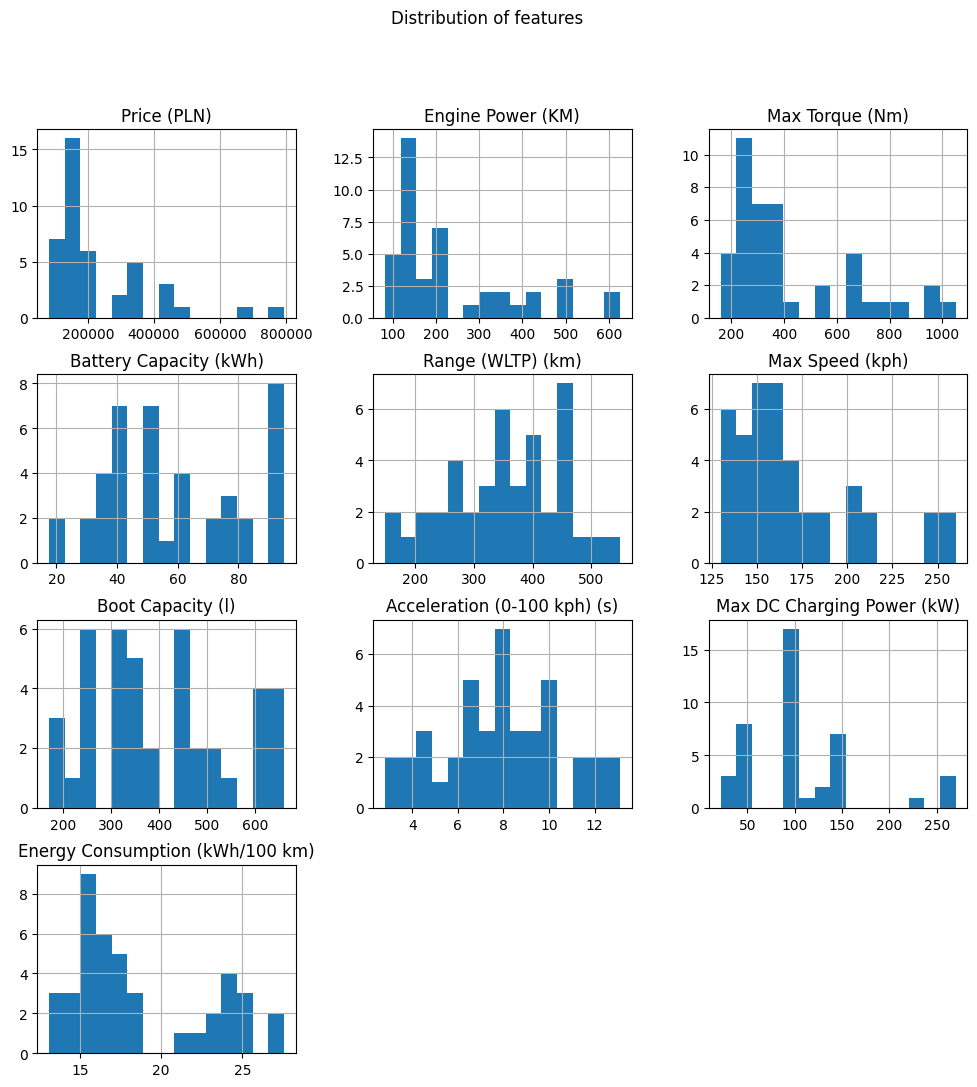

In [27]:
df_cleaned[["Price (PLN)", "Engine Power (KM)", "Max Torque (Nm)","Battery Capacity (kWh)", "Range (WLTP) (km)", "Max Speed (kph)","Boot Capacity (l)", "Acceleration (0-100 kph) (s)","Max DC Charging Power (kW)", "Energy Consumption (kWh/100 km)"]].hist(bins=15, figsize=(12, 12))
plt.suptitle("Distribution of features")
plt.show()

# Radar Chart

In [28]:
# prompt: Take the rows from df_cleaned whose names correlate to the names in final_ranking, and put them in a new frame I can use to make a new radar chart
new_final_ranking = final_ranking.head(6)
radar_df = normalized_df[normalized_df['Ev Car'].isin(new_final_ranking['Ev Car'])]

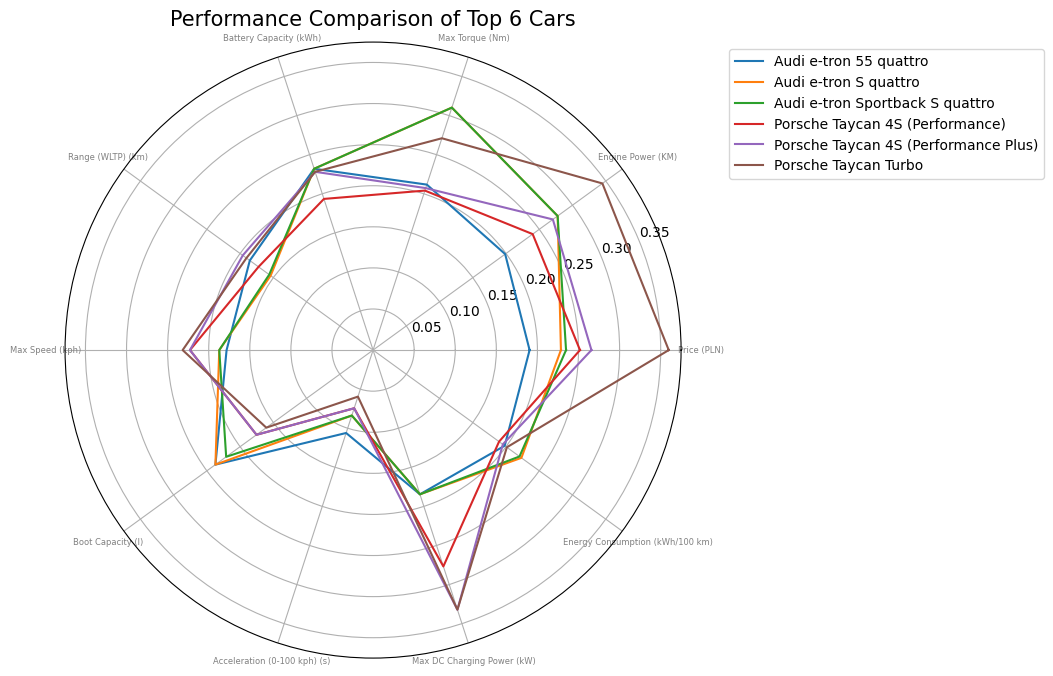

In [40]:
import math
top_6_cars = radar_df.head(6)
features = ["Price (PLN)", "Engine Power (KM)","Max Torque (Nm)", "Battery Capacity (kWh)", "Range (WLTP) (km)","Max Speed (kph)", "Boot Capacity (l)", "Acceleration (0-100 kph) (s)","Max DC Charging Power (kW)", "Energy Consumption (kWh/100 km)"]
N = len(features)

angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
for i, row in top_6_cars.iterrows():
    values = row[features].values.flatten().tolist()
    values += values[:1]
    plt.polar(angles, values, label=row["Ev Car"])

plt.xticks(angles[:-1], features, color='grey', size=6)
plt.title("Performance Comparison of Top 6 Cars", size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

#For Long range:

In [43]:
new_final_ranking = long_range_ranking.head(6)
radar_df = normalized_df[normalized_df['Ev Car'].isin(new_final_ranking['Ev Car'])]

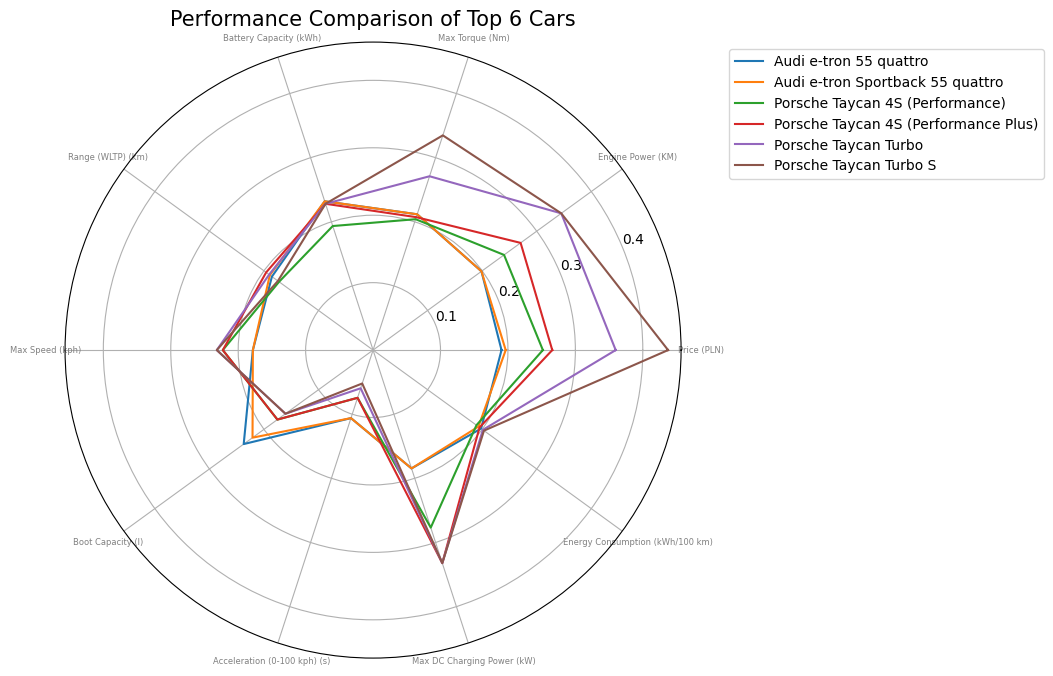

In [44]:
import math
top_6_cars = radar_df.head(6)
features = ["Price (PLN)", "Engine Power (KM)","Max Torque (Nm)", "Battery Capacity (kWh)", "Range (WLTP) (km)","Max Speed (kph)", "Boot Capacity (l)", "Acceleration (0-100 kph) (s)","Max DC Charging Power (kW)", "Energy Consumption (kWh/100 km)"]
N = len(features)

angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
for i, row in top_6_cars.iterrows():
    values = row[features].values.flatten().tolist()
    values += values[:1]
    plt.polar(angles, values, label=row["Ev Car"])

plt.xticks(angles[:-1], features, color='grey', size=6)
plt.title("Performance Comparison of Top 6 Cars", size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()